In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import binom


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc



In [263]:
#load the dataset
data_origin = pd.read_csv('./NC-2021-v1-1.csv')

# create a separate DataFrame for analysis to avoid modifying the original one
data = data_origin.copy()


In [264]:
#have a quick look at the data
data.head()


,Unnamed: 0,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency
0,0,22.942130,31,SE,"No, never",University,Wake same every workday,1,pregnant,0.640000,25.588235,2.526332,True,0.200000
1,1,19.886054,34,NaN,NaN,University,NaN,7,pregnant,0.009569,30.875000,3.522884,True,0.052632
2,2,29.323049,41,SE,"No, never",University,Several times during the night,4,not_pregnant,0.298246,27.666667,2.503331,True,0.149123
3,3,24.386526,27,SE,"No, never",High school,Wake same every workday,2,pregnant,0.895833,24.250000,3.453776,True,0.145833
4,4,29.299971,29,SE,"No, never",Trade/technical/vocational training,Wake same every day,2,pregnant,0.666667,25.466667,0.990430,True,0.254902


In [265]:
print(data.describe())

        Unnamed: 0          bmi          age  n_cycles_trying   dedication   
count  1995.000000  1995.000000  1995.000000      1995.000000  1995.000000  \
mean    999.139348    23.357643    31.898747         4.725815     0.475641   
std     577.659721     4.982275     4.063534         4.600871     0.335528   
min       0.000000     0.000000    19.000000         1.000000     0.000000   
25%     499.500000    20.708276    29.000000         1.000000     0.132567   
50%     998.000000    22.530864    32.000000         3.000000     0.505415   
75%    1498.500000    25.303154    35.000000         6.000000     0.780816   
max    2000.000000    50.611299    44.000000        26.000000     1.347826   

       average_cycle_length  cycle_length_std  intercourse_frequency  
count           1989.000000       1970.000000            1995.000000  
mean              30.530185          4.465253               0.106986  
std                7.010407          8.675280               0.105248  
min          

In [266]:
#check how many NaN data exist
print(data.isnull().sum())


Unnamed: 0                 0
bmi                        0
age                        0
country                  113
been_pregnant_before     317
education                391
sleeping_pattern         499
n_cycles_trying            0
outcome                    0
dedication                 0
average_cycle_length       6
cycle_length_std          25
regular_cycle              6
intercourse_frequency      0
dtype: int64


In [267]:
#drop NaN data, make sure data consistency
data = data.dropna()


In [268]:
print(data.describe())

        Unnamed: 0          bmi          age  n_cycles_trying   dedication   
count  1185.000000  1185.000000  1185.000000      1185.000000  1185.000000  \
mean    997.557806    23.707699    31.638819         4.860759     0.540974   
std     577.302858     5.135105     3.946797         4.710722     0.318571   
min       0.000000     0.000000    20.000000         1.000000     0.000000   
25%     491.000000    20.907812    29.000000         2.000000     0.276596   
50%     997.000000    22.758307    32.000000         3.000000     0.600000   
75%    1475.000000    25.793152    34.000000         6.000000     0.821429   
max    2000.000000    50.611299    44.000000        26.000000     1.347826   

       average_cycle_length  cycle_length_std  intercourse_frequency  
count           1185.000000       1185.000000            1185.000000  
mean              30.839707          4.635085               0.119835  
std                6.662115          7.144617               0.106815  
min          

# Q1: Chance of getting pregnant within 13 cycles

In [33]:
# get the total number of cases within 13 cycles 
total_cycles_within_13 = data[data['n_cycles_trying'] <= 13]
total_cycles_within_13

,Unnamed: 0,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency
0,0,22.942130,31,SE,"No, never",University,Wake same every workday,1,pregnant,0.640000,25.588235,2.526332,True,0.200000
2,2,29.323049,41,SE,"No, never",University,Several times during the night,4,not_pregnant,0.298246,27.666667,2.503331,True,0.149123
3,3,24.386526,27,SE,"No, never",High school,Wake same every workday,2,pregnant,0.895833,24.250000,3.453776,True,0.145833
4,4,29.299971,29,SE,"No, never",Trade/technical/vocational training,Wake same every day,2,pregnant,0.666667,25.466667,0.990430,True,0.254902
9,9,27.450228,28,US,"No, never",University,Wake same every workday,1,pregnant,0.000000,32.285714,4.214053,True,0.193548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,1993,20.298985,29,NO,"No, never",High school,Wake same every workday,1,pregnant,0.888889,27.142857,1.167321,True,0.259259
1988,1994,18.125235,30,FR,"No, never",PhD,Wake same every day,2,pregnant,0.882353,34.545455,7.047888,False,0.000000
1989,1995,22.375680,36,DE,"No, never",University,Shift worker,3,pregnant,0.045977,26.812500,2.948870,True,0.091954
1993,1999,21.453574,30,FI,"No, never",University,Wake same every workday,1,not_pregnant,0.000000,38.600000,41.126634,False,0.000000


In [34]:
# get the total number of cases within 13 cycles and pregnant
pregnant_cycles_within_13 = data[(data['n_cycles_trying'] <= 13) & (data['outcome'] == 'pregnant')]
pregnant_cycles_within_13

,Unnamed: 0,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency
0,0,22.942130,31,SE,"No, never",University,Wake same every workday,1,pregnant,0.640000,25.588235,2.526332,True,0.200000
3,3,24.386526,27,SE,"No, never",High school,Wake same every workday,2,pregnant,0.895833,24.250000,3.453776,True,0.145833
4,4,29.299971,29,SE,"No, never",Trade/technical/vocational training,Wake same every day,2,pregnant,0.666667,25.466667,0.990430,True,0.254902
9,9,27.450228,28,US,"No, never",University,Wake same every workday,1,pregnant,0.000000,32.285714,4.214053,True,0.193548
10,10,22.812519,38,US,"Yes, twice",PhD,Wake same every day,5,pregnant,0.908163,26.250000,1.770122,True,0.193878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1990,22.506925,28,SE,"No, never",Elementary school,Wake same every day,1,pregnant,0.903226,29.571429,4.503967,True,0.096774
1987,1993,20.298985,29,NO,"No, never",High school,Wake same every workday,1,pregnant,0.888889,27.142857,1.167321,True,0.259259
1988,1994,18.125235,30,FR,"No, never",PhD,Wake same every day,2,pregnant,0.882353,34.545455,7.047888,False,0.000000
1989,1995,22.375680,36,DE,"No, never",University,Shift worker,3,pregnant,0.045977,26.812500,2.948870,True,0.091954


### Overall Probability 

In [36]:
chance_of_pregnancy = len(pregnant_cycles_within_13) / len(total_cycles_within_13)
print(f"The overall probability of getting pregnant within 13 cycles is: {chance_of_pregnancy:.2%}")


The overall probability of getting pregnant within 13 cycles is: 67.46%


### Categorized Probability

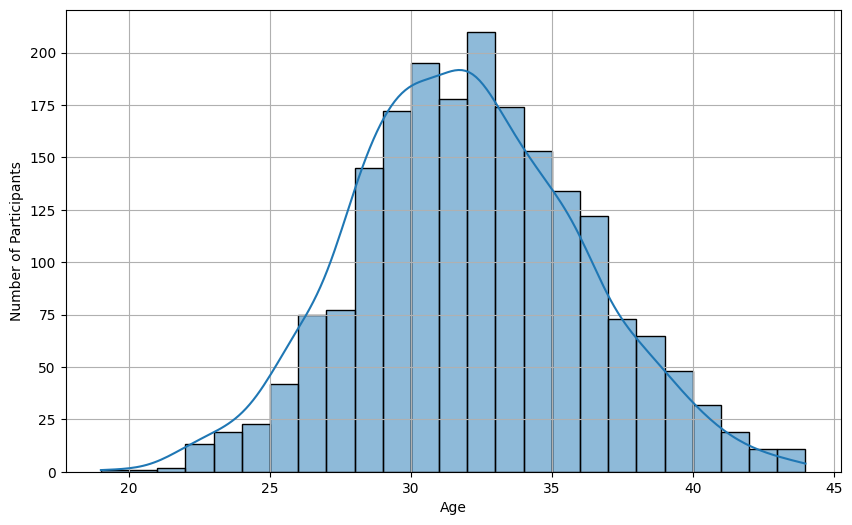

count    1995.000000
mean       31.898747
std         4.063534
min        19.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        44.000000
Name: age, dtype: float64

In [114]:
# overview of the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=range(data['age'].min(), data['age'].max() + 1), kde=True)
#plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.grid(True)
plt.show()

age_descriptive_stats = data['age'].describe()
age_descriptive_stats


In [102]:

# split data as different age groups
bins = [0, 24, 29, 34, 40, np.inf]
labels = ['< 24', '25-29', '30-34','35-40', '> 40']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
data_13_cycles = data[data['n_cycles_trying'] <= 13]


In [103]:


# function to calculate chance and 95% CI
def calculate_chance_and_ci(data, group):
    success = data[data['outcome'] == 'pregnant'].shape[0]
    total = data.shape[0]
    chance = (success / total) * 100 if total > 0 else 0

    ci_lower, ci_upper = binom.interval(0.95, total, success/total) if total > 0 else (0, 0)
    ci_lower_percent = (ci_lower / total) * 100 if total > 0 else 0
    ci_upper_percent = (ci_upper / total) * 100 if total > 0 else 0

    return {
        f'Age Group' : group,
        'Chance of Pregnancy (%)': chance,
        '95% CI Lower Bound (%)': ci_lower_percent,
        '95% CI Upper Bound (%)': ci_upper_percent
    }

# calculate for each age group
chances_by_age_group = [calculate_chance_and_ci(data_13_cycles[data_13_cycles['age_group'] == group], group) for group in labels]

# create a DataFrame for the results
chances_df = pd.DataFrame(chances_by_age_group)
chances_df


,Age Group,Chance of Pregnancy (%),95% CI Lower Bound (%),95% CI Upper Bound (%)
0,< 24,46.428571,33.928571,58.928571
1,25-29,63.934426,59.631148,68.237705
2,30-34,65.029240,61.871345,68.187135
3,35-40,57.547170,52.830189,62.264151
4,> 40,34.482759,17.241379,51.724138


In [70]:
print(chances_df.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format))

\begin{tabular}{lrrr}
\toprule
Age Group & Chance of Pregnancy (%) & 95% CI Lower Bound (%) & 95% CI Upper Bound (%) \\
\midrule
< 24 & 46.4 & 33.9 & 58.9 \\
25-29 & 63.9 & 59.6 & 68.2 \\
30-34 & 65.0 & 61.9 & 68.2 \\
35-40 & 57.5 & 52.8 & 62.3 \\
> 40 & 34.5 & 17.2 & 51.7 \\
\bottomrule
\end{tabular}



# Q2: How long does it usually take to get pregnant?



In [106]:
# filter only those who got pregnant
pregnant_data = data[data['outcome'] == 'pregnant']

# function to calculate mean and CI
def calculate_mean_and_ci(group):
    mean = group.mean()
    ci_lower, ci_upper = stats.t.interval(0.95, len(group)-1, loc=mean, scale=stats.sem(group))
    return pd.Series({'mean_cycles': mean, 'ci_lower': ci_lower, 'ci_upper': ci_upper})

# calculate mean and CI for each age group
pregnant_data_by_age = pregnant_data.groupby('age_group')['n_cycles_trying'].apply(calculate_mean_and_ci).unstack().reset_index()

pregnant_data_by_age


,age_group,mean_cycles,ci_lower,ci_upper
0,< 24,2.653846,2.018362,3.289330
1,25-29,3.073718,2.790152,3.357284
2,30-34,3.262590,3.044798,3.480382
3,35-40,4.061475,3.660246,4.462705
4,> 40,4.200000,2.239464,6.160536


In [150]:
pregnant_data_by_age['mean_cycles']

0    2.653846
1    3.073718
2    3.262590
3    4.061475
4    4.200000
Name: mean_cycles, dtype: float64

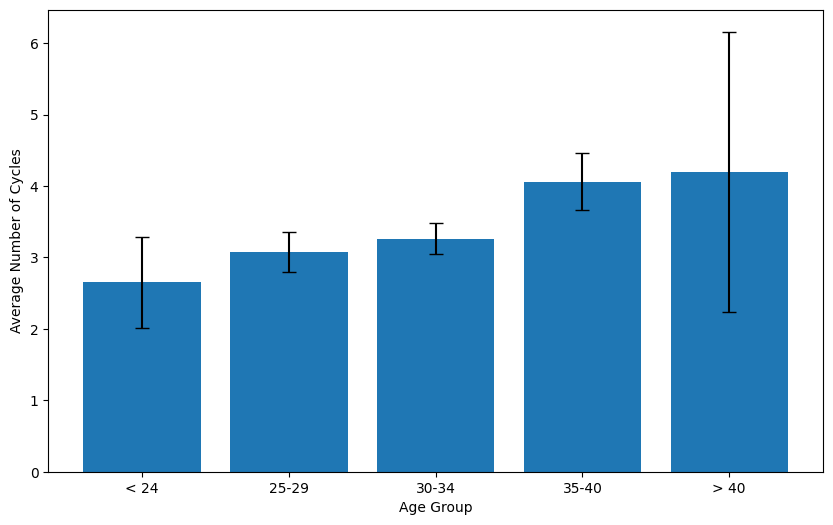

In [113]:
# get error bars from upper - lower CI bound
pregnant_data_by_age['error'] = pregnant_data_by_age['ci_upper'] - pregnant_data_by_age['ci_lower']

# plot them
plt.figure(figsize=(10, 6))
plt.bar(pregnant_data_by_age.index, pregnant_data_by_age['mean_cycles'], yerr=pregnant_data_by_age['error'] / 2, capsize=5)
plt.xlabel('Age Group')
plt.ylabel('Average Number of Cycles')
#plt.title('Average Time to Conceive by Age Group with 95% Confidence Interval')
plt.xticks(ticks=np.arange(len(labels)), labels=labels)

plt.show()


# Q3: What factors impact the time it takes to get pregnant?


In [269]:
## check how many types of eduction level, for later mapping
type_of_education = data['education'].unique()
type_of_education


array(['University', 'High school', 'Trade/technical/vocational training',
       'PhD', 'Elementary school'], dtype=object)

In [270]:
## encoding mapping
education_mapping = {
    'Elementary school':1,
    'High School': 2,
    'Trade/technical/vocational training': 3,
    'University': 4,
    'PhD': 5
}

data['education_encoded'] = data['education'].map(education_mapping)


In [271]:
type_of_previous_pregnancy = data['been_pregnant_before'].unique()
type_of_previous_pregnancy 

array(['No, never', 'Yes, twice', 'Yes, once', 'Yes 3 times or more'],
      dtype=object)

In [272]:
map_of_previous_pregnancy = {
    'No, never':0,
    'Yes, once': 1,
    'Yes, twice': 2,
    'Yes 3 times or more': 3
    }

data['previous_pregnancy_encoded'] = data['been_pregnant_before'].map(map_of_previous_pregnancy)

In [273]:
data = data.loc[:, ~data.columns.str.contains('Unnamed')]
data

,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency,education_encoded,previous_pregnancy_encoded
0,22.942130,31,SE,"No, never",University,Wake same every workday,1,pregnant,0.640000,25.588235,2.526332,True,0.200000,4.0,0
2,29.323049,41,SE,"No, never",University,Several times during the night,4,not_pregnant,0.298246,27.666667,2.503331,True,0.149123,4.0,0
3,24.386526,27,SE,"No, never",High school,Wake same every workday,2,pregnant,0.895833,24.250000,3.453776,True,0.145833,NaN,0
4,29.299971,29,SE,"No, never",Trade/technical/vocational training,Wake same every day,2,pregnant,0.666667,25.466667,0.990430,True,0.254902,3.0,0
9,27.450228,28,US,"No, never",University,Wake same every workday,1,pregnant,0.000000,32.285714,4.214053,True,0.193548,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,20.298985,29,NO,"No, never",High school,Wake same every workday,1,pregnant,0.888889,27.142857,1.167321,True,0.259259,NaN,0
1988,18.125235,30,FR,"No, never",PhD,Wake same every day,2,pregnant,0.882353,34.545455,7.047888,False,0.000000,5.0,0
1989,22.375680,36,DE,"No, never",University,Shift worker,3,pregnant,0.045977,26.812500,2.948870,True,0.091954,4.0,0
1993,21.453574,30,FI,"No, never",University,Wake same every workday,1,not_pregnant,0.000000,38.600000,41.126634,False,0.000000,4.0,0


In [278]:
# get categorical columns, for numerical calculation later
data_corr = data.drop(columns=['country','education','been_pregnant_before'],axis=1)
categorical_features = ['sleeping_pattern']

data_corr['outcome'] = data_corr['outcome'].map({'pregnant': 1, 'not_pregnant': 0})
data_corr['regular_cycle'] = data_corr['regular_cycle'].astype(int)#.map({'True': 1, 'False': 0})


In [285]:

# create a ColumnTransformer object for one-hot encoding for categorical column 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # This will keep all other columns in the dataset unchanged
)

data_transformed = preprocessor.fit_transform(data_corr)

# convert the transformed data back into a DataFrame
columns = (preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist() +
           data_corr.drop(columns=categorical_features).columns.tolist())

data_transformed_df = pd.DataFrame(data_transformed, columns=columns)

# reorder the 'outcome' column, make it easier to read 
columns_except_outcome = [col for col in data_transformed_df.columns if col != 'outcome']
new_column_order = columns_except_outcome + ['outcome']
reordered_df = data_transformed_df[new_column_order]




/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


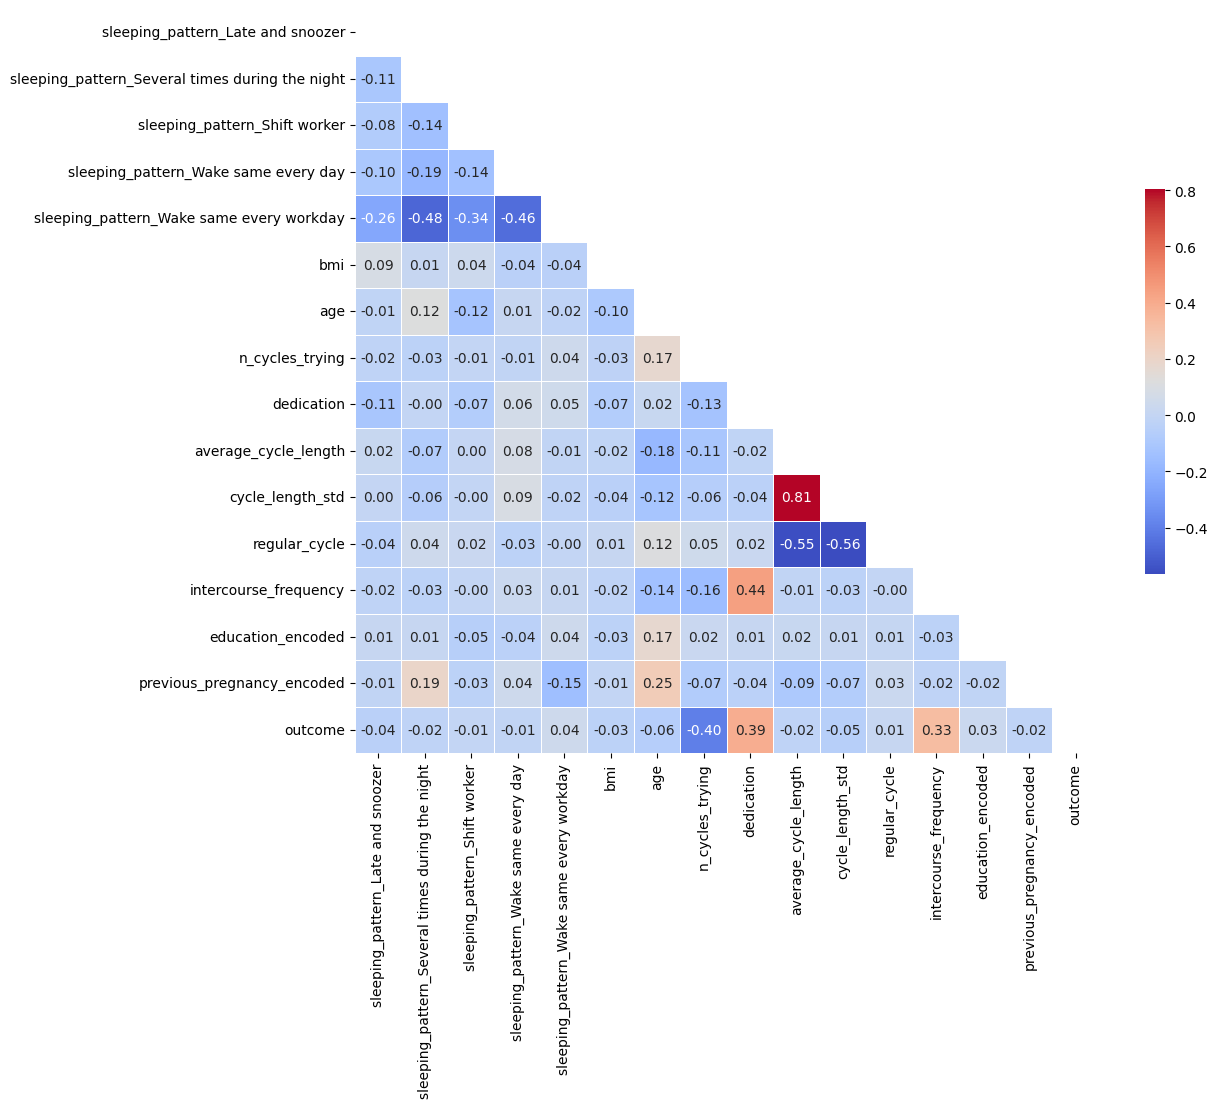

In [286]:
# calculate the correlation matrix
corr_matrix = reordered_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# draw the correlation plot 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


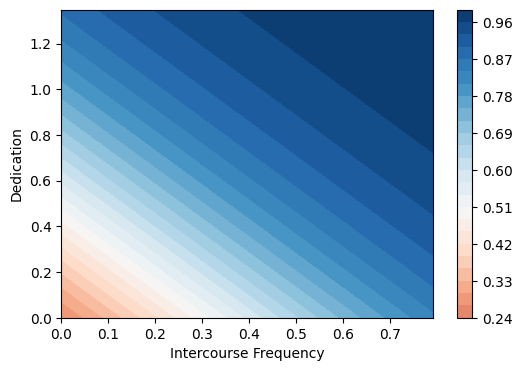

In [302]:
#  get the column you want to investigate the correlation for the outcome
x = reordered_df['intercourse_frequency']
y = reordered_df['dedication']
z = reordered_df['outcome']

x_range = np.linspace(x.min(), x.max(), 100)
y_range = np.linspace(y.min(), y.max(), 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)

X = reordered_df[['intercourse_frequency', 'dedication']]
y = reordered_df['outcome']

# get the LogisticRegression and fit the model
model = LogisticRegression()
model.fit(X, y)

# predict probabilities on the grid
z_pred = model.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])[:, 1]
z_grid = z_pred.reshape(x_grid.shape)

# plot the contour map
plt.figure(figsize=(6, 4))
contour = plt.contourf(x_grid, y_grid, z_grid, 25, cmap="RdBu", vmin=0, vmax=1)
plt.colorbar(contour)
plt.xlabel('Intercourse Frequency')
plt.ylabel('Dedication')
#plt.title('Contour plot of pregnancy outcome probability')
plt.show()


In [313]:
# group the outcome variable data by the categories in 'sleeping_pattern'
groups = data_corr.groupby('sleeping_pattern')['outcome'].apply(list)

# ANOVA test
f_statistic, p_value = f_oneway(*groups)

print(f'F-Statistic: {f_statistic}')
print(f'p-Value: {p_value}')

F-Statistic: 0.8079049366937513
p-Value: 0.5201094155512026


## ML test 

In [306]:
# for supervised training, drop the label in X for input, and only keep the label in y for output
X = reordered_df.drop(['outcome'], axis=1)
y = reordered_df['outcome']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

#create the preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', StandardScaler())])  # Scale data


# combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# create a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)

# check the coefficients of each feature (if necessary)
if hasattr(model.named_steps['classifier'], 'coef_'):
    # get feature names from the preprocessor
    feature_names = numeric_features
    # assign coefficients to features
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': model.named_steps['classifier'].coef_[0]})
    print(feature_importance.sort_values(by='importance', ascending=False))
else:
    print("The model does not have the attribute 'coef_', unable to retrieve feature importance.")

                                            feature  importance
8                                        dedication    0.606981
12                            intercourse_frequency    0.581610
13                                education_encoded    0.132103
4          sleeping_pattern_Wake same every workday    0.102068
6                                               age    0.045149
10                                 cycle_length_std    0.020371
2                     sleeping_pattern_Shift worker    0.011893
0                 sleeping_pattern_Late and snoozer   -0.028122
1   sleeping_pattern_Several times during the night   -0.030674
5                                               bmi   -0.071805
11                                    regular_cycle   -0.097084
3              sleeping_pattern_Wake same every day   -0.102137
14                       previous_pregnancy_encoded   -0.115870
9                              average_cycle_length   -0.170643
7                                   n_cy

Accuracy: 0.75
Confusion Matrix:
[[ 57  33]
 [ 26 121]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.63      0.66        90
         1.0       0.79      0.82      0.80       147

    accuracy                           0.75       237
   macro avg       0.74      0.73      0.73       237
weighted avg       0.75      0.75      0.75       237



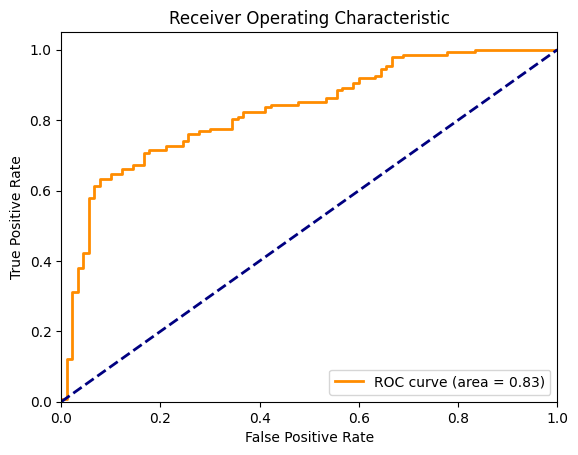

In [307]:
# make predictions on the test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# get a classification report
class_report = classification_report(y_test, y_pred)

# get ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
